# librairie Seaborn 
- vient proposer une alternative à Matplotlib
-  également une librairie permettant de générer des graphiques, tout comme Matplotlib
- on pourrait imaginer que Seaborn est une voiture flambant neuve dont l’ensemble du châssis et le moteur seraient Matplotlib.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
prets = pd.read_csv('prets_enrichi.csv')
prets.head()

,identifiant,ville,CP,revenu,remboursement,duree,type,taux_interet,taux_endettement,cout_total,benefices,risque
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168,30.80,271212.0,131.99,Non
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701,4.52,15360.0,23.69,Non
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173,23.50,374355.0,182.97,Non
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972,29.50,132609.6,53.71,Non
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014,34.80,105485.4,44.57,Non


### un nuage de points
on utilise la fonction scatterplot avec Searborn
- dans un premier temps, on définit le data frame qui va être utilisé pour tracer le graphique, via l’argument  data ;
- ensuite, il suffit de fixer les variables du data frame défini, à mettre en abscisse et en ordonnée.


<AxesSubplot:xlabel='revenu', ylabel='taux_endettement'>

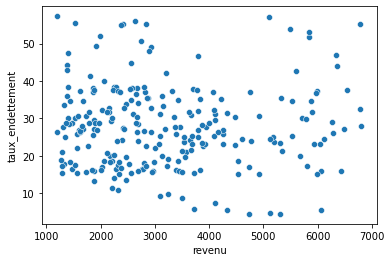

In [3]:
sns.scatterplot(data=prets, x='revenu', y='taux_endettement')

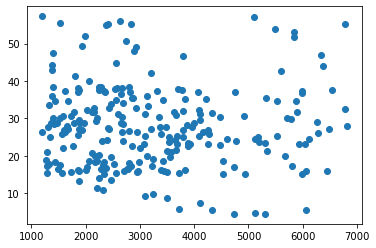

In [4]:
plt.scatter(prets['revenu'], prets['taux_endettement'])

le réel intérêt de Seaborn apparaît lorsqu’on essaie d’ajouter des dimensions supplémentaires, comme des couleurs ou des tailles de points.

- la variable via l’argument hue , Seaborn crée automatiquement une couleur pour chaque valeur existante.

<AxesSubplot:xlabel='revenu', ylabel='taux_endettement'>

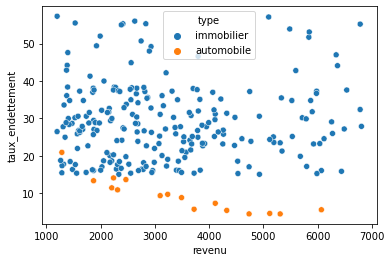

In [5]:
sns.scatterplot(data=prets, x='revenu', y='taux_endettement', hue='type')

<AxesSubplot:xlabel='revenu', ylabel='taux_endettement'>

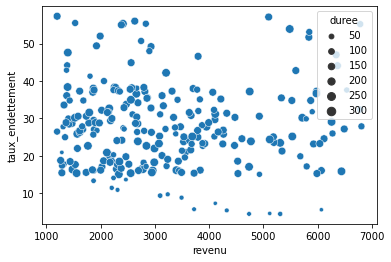

In [6]:
sns.scatterplot(data=prets, x='revenu', y='taux_endettement', size='duree')

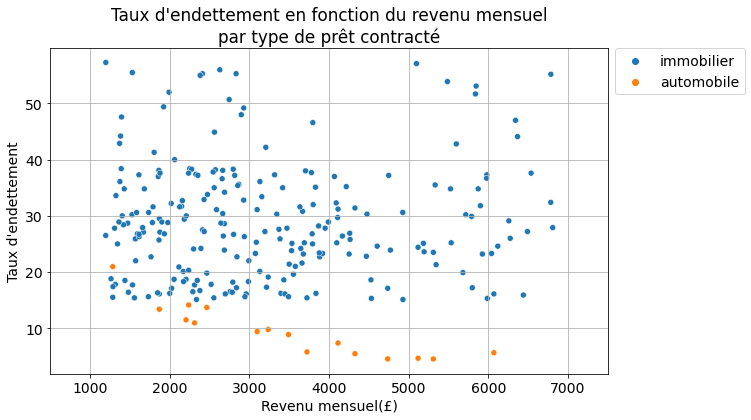

In [7]:
plt.figure(figsize=(10, 6))

plt.rcParams.update({'font.size':14})

sns.scatterplot(data=prets, x='revenu', y='taux_endettement', hue='type')

plt.ylabel("Taux d'endettement")

plt.xlabel('Revenu mensuel(£)')

plt.grid()

plt.xlim(500, 7500)

plt.legend(bbox_to_anchor=(1, 1.02))

plt.title("Taux d'endettement en fonction du revenu mensuel\npar type de prêt contracté")

plt.show()



###  les différentes fonctions utilisées :

- La fonction "rcParams.update" , avec l’argument "font.size" , définit pour tous les graphiques – et non pas uniquement le graphique actuel – la taille de la police de tous les éléments (xlabel, title, legend, etc.) à 14.

- "grid" permet d’afficher le quadrillage.

- Via la fonction "xlim" , on fixe les limites des graduations de 500 à 7 500.

- La fonction "legend" affiche la légende sur le graphique. La petite nouveauté ici est l’utilisation de l’argument "bbox_to_anchor" permettant de fixer la position de la légende en dehors du graphique, aux coordonnées renseignées.

### Agrégez des données avec Seaborn
- La fonction "barplot"
- ci , pour confidence interval (ou intervalle de confiance), qui ajoute les intervalles de confiance à chaque barre. Fixer cet argument à "None" permet de les faire disparaître ;
- "estimator" correspond à la fonction d’agrégation.

<AxesSubplot:xlabel='ville', ylabel='remboursement'>

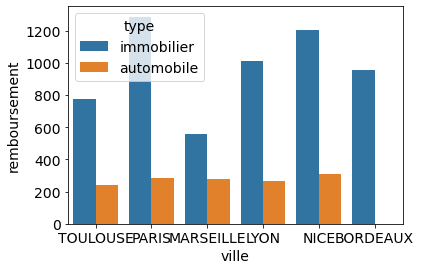

In [8]:
sns.barplot(data=prets, x='ville', y='remboursement', ci=None, estimator=np.mean, hue='type')

Seaborn possède de nombreuses fonctions (plus d’une vingtaine)
https://seaborn.pydata.org/api.html
https://seaborn.pydata.org/generated/seaborn.countplot.html
- lineplot  pour tracer des courbes ;

- boxplot  pour des boîtes à moustaches ;

- histplot  pour des histogrammes ;

- kdeplot  pour un graphique à densité ;

- pairplot  pour tracer l’ensemble des variables numériques deux à deux, sur un seul graphique !

<AxesSubplot:xlabel='ville', ylabel='remboursement'>

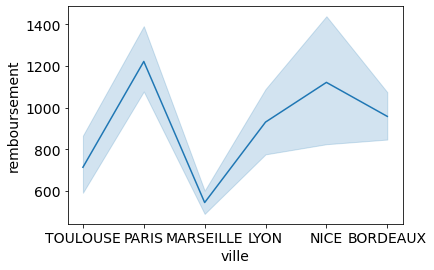

In [9]:
sns.lineplot(data=prets, x='ville', y='remboursement')

<AxesSubplot:xlabel='ville', ylabel='remboursement'>

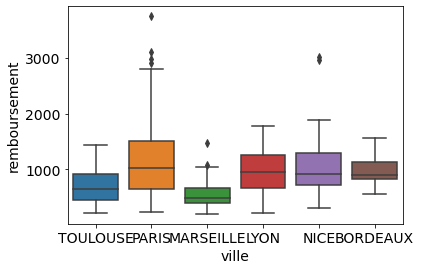

In [10]:
sns.boxplot(data=prets, x='ville', y='remboursement')

<AxesSubplot:xlabel='ville', ylabel='remboursement'>

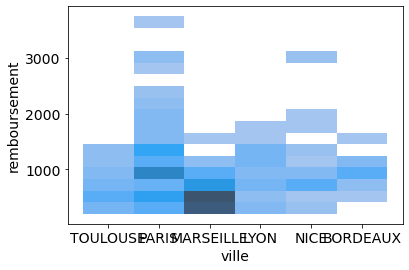

In [11]:
sns.histplot(data=prets, x='ville', y='remboursement')

### Les palettes graphiques
https://seaborn.pydata.org/tutorial/color_palettes.html?highlight=color
on utilise la fonction "set_palette" de Seaborn. Exemple graphiques avec un aspect un peu plus pastel : sns.set_palette('pastel')
sns.set_palette('dark')
sns.set_palette('Set2')

In [12]:
sns.barplot(data=prets, x='ville', y='remboursement'
sns.set_palette('pastel')

SyntaxError: invalid syntax (134640286.py, line 2)

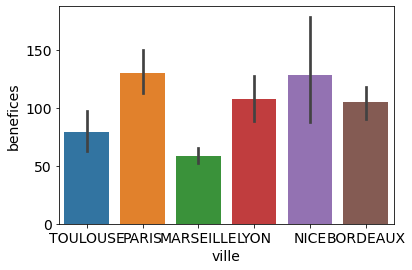

In [14]:
#plt.bar(height= df_ville['benefices'], x=df_ville['ville'])
sns.barplot(data=prets, y='benefices', x='ville')
sns.set_palette('dark')

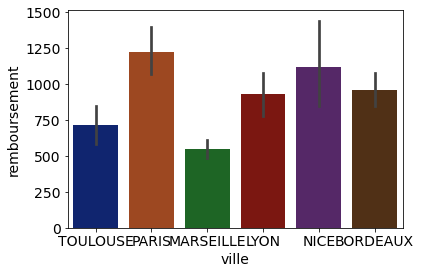

In [44]:
sns.barplot(data=prets, y='remboursement', x='ville')
sns.set_palette('dark')

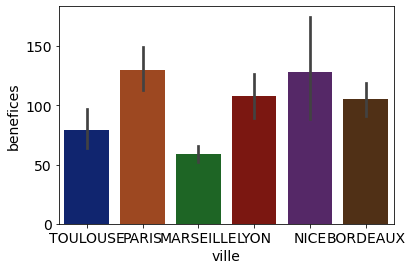

In [45]:
sns.barplot(data=prets, y='benefices', x='ville')
sns.set_palette('Set2')

 ### thèmes 
 - correspondent à des ensembles d’aspects graphiques (sur les axes, le fond, la graduation, etc.): "set_theme"

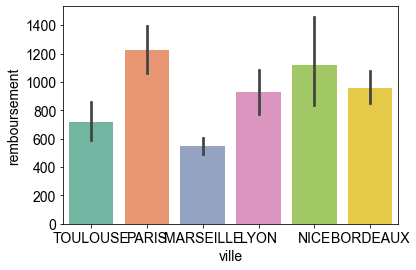

In [46]:
sns.barplot(data=prets, y='remboursement', x='ville')
sns.set_palette('dark')
sns.set_theme()

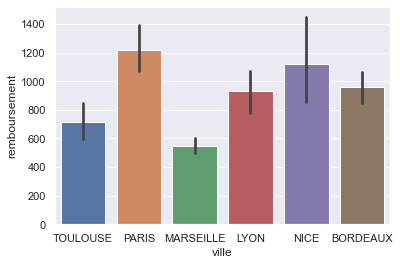

In [47]:
sns.barplot(data=prets, y='remboursement', x='ville')
sns.set_palette('dark')
sns.set_theme(style='whitegrid', palette='pastel')

## EXERCICES D'APPLICATION
1. proportion de prêt par type de prêt.
sns.countplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)
2. bénéfice mensuel réalisé en fonction du revenu du client - prêts immobiliers
3. La distribution des bénéfices réalisés
https://seaborn.pydata.org/generated/seaborn.kdeplot.html
sns.kdeplot(x=None, *, y=None, shade=None, vertical=False, kernel=None, bw=None, gridsize=200, cut=3, clip=None, legend=True, cumulative=False, shade_lowest=None, cbar=False, cbar_ax=None, cbar_kws=None, ax=None, weights=None, hue=None, palette=None, hue_order=None, hue_norm=None, multiple='layer', common_norm=True, common_grid=False, levels=10, thresh=0.05, bw_method='scott', bw_adjust=1, log_scale=None, color=None, fill=None, data=None, data2=None, warn_singular=True, **kwargs)
4. bénéfice mensuel total réalisé par agence

In [48]:
sns.countplot(data=prets, x='type', y='remboursement', hue=None)

ValueError: Cannot pass values for both `x` and `y`

<AxesSubplot:xlabel='count', ylabel='remboursement'>

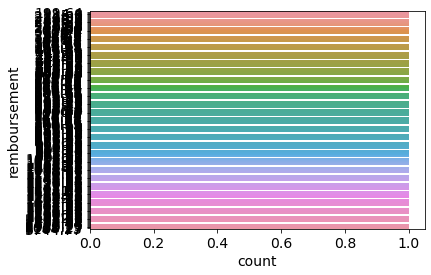

In [16]:
sns.countplot(data=prets, x=None, y='remboursement', hue=None)

<AxesSubplot:xlabel='type', ylabel='count'>

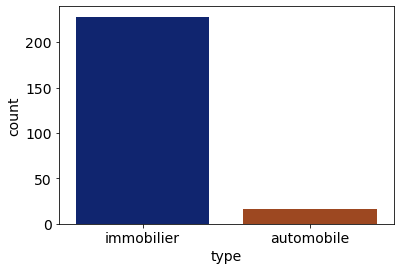

In [17]:
sns.countplot(data=prets, x='type', y=None, hue=None)

<AxesSubplot:ylabel='count'>

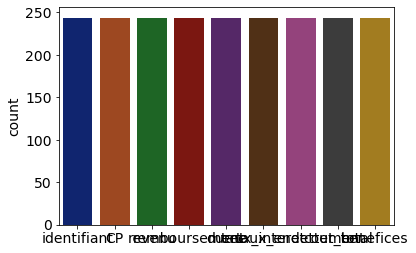

In [18]:
sns.countplot(data=prets, x=None, y=None, hue=None)

<AxesSubplot:xlabel='revenu', ylabel='benefices'>

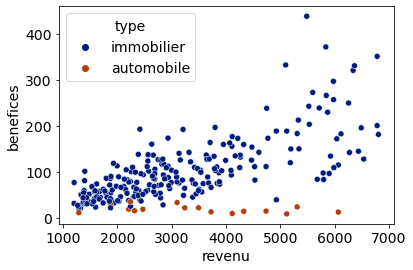

In [19]:
sns.scatterplot(data=prets, x='revenu', y='benefices', hue='type')

<AxesSubplot:xlabel='benefices', ylabel='Count'>

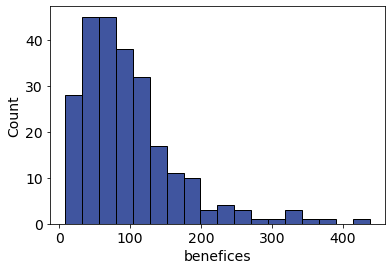

In [20]:
sns.histplot(data=prets, x='benefices')

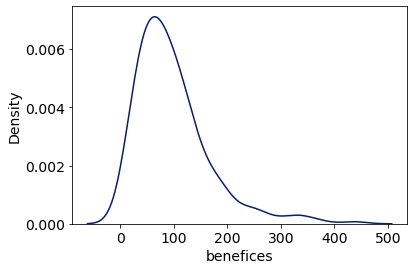

In [21]:
sns.kdeplot(data=prets, x='benefices')
plt.show()


<AxesSubplot:xlabel='ville', ylabel='benefices'>

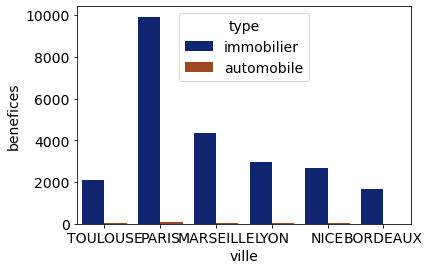

In [22]:
sns.barplot(data=prets, x='ville', y='benefices', ci=None, estimator=sum, hue='type')

<AxesSubplot:xlabel='ville', ylabel='Count'>

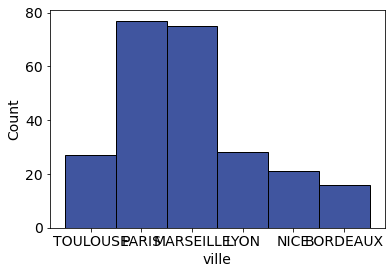

In [23]:
sns.histplot(data=prets, x='ville')

<AxesSubplot:xlabel='benefices', ylabel='Count'>

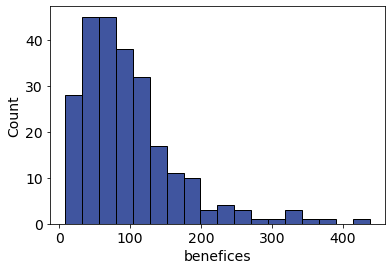

In [24]:
sns.histplot(data=prets, x='benefices')

<AxesSubplot:xlabel='benefices', ylabel='Density'>

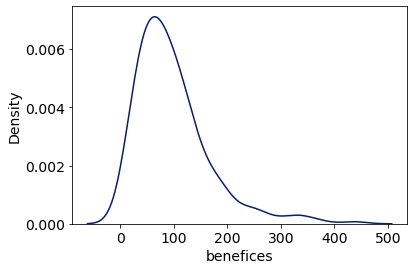

In [25]:
sns.kdeplot(data=prets, x='benefices')

# Quizz final

<AxesSubplot:xlabel='revenu', ylabel='benefices'>

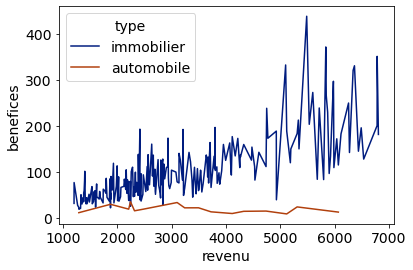

In [29]:
sns.lineplot(data=prets, x='revenu', y='benefices', hue='type')

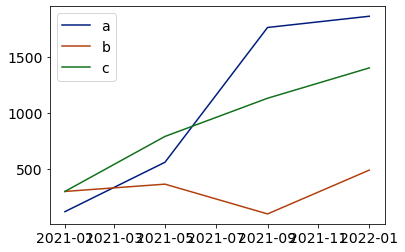

In [30]:
# création d'une Series de 4 dates
dates = pd.to_datetime(['2021-01-01', '2021-05-01', '2021-09-01', '2022-01-01'])

# création de 3 listes Y1, Y2 et Y3
Y1 = [120, 560, 1760, 1860]
Y2 = [300, 365, 100, 490]
Y3 = [300, 790, 1130, 1400]

plt.figure()
plt.plot(dates, Y1, label='a')
plt.plot(dates, Y2, label='b')
plt.plot(dates, Y3, label='c')
plt.legend()
plt.show()

import seaborn as sns
iris = sns.load_dataset('iris')


Ce dernier contient les informations suivantes sur des iris  :

sepal_length  : la longueur des sépales ;
sepal_width  : la largeur des sépales ;
petal_length  : la longueur des pétales ;
petal_width  : la largeur des pétales ;
species  : l’espèce d’iris correspondante.

In [32]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

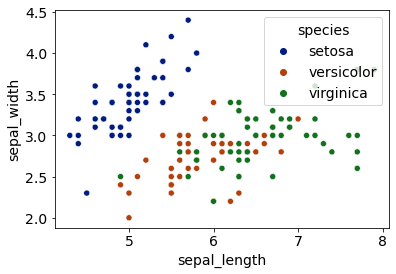

In [33]:
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species')

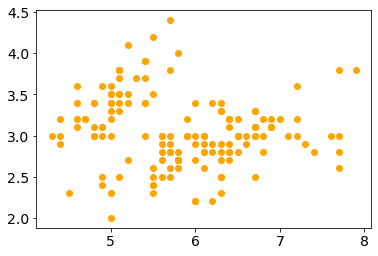

In [35]:
plt.scatter(iris['sepal_length'], iris['sepal_width'], color='orange')

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not pink

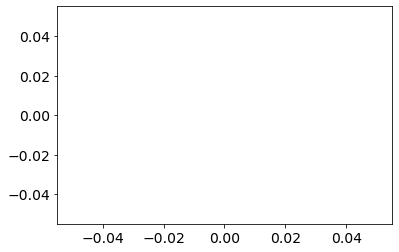

In [37]:
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', c='pink')

<AxesSubplot:xlabel='species', ylabel='petal_width'>

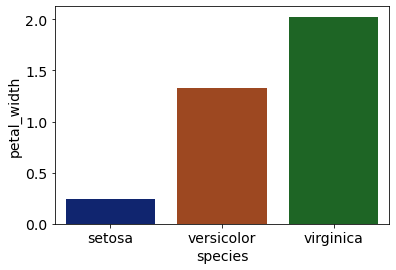

In [38]:
sns.barplot(data=iris, x='species', y='petal_width', ci=None, estimator=np.mean)

mpg = sns.load_dataset('mpg')

Ce dataset contient des informations sur près de 400 voitures relativement anciennes (années de production entre 1970 et 1982). On y retrouve notamment :

mpg  , signifiant miles per gallon, qu’on pourrait traduire par kilométrage au litre ;
cylinders  : le nombre de cylindres du modèle ;
displacement  : volume (en litres) de la cylindrée du moteur ;
horsepower  : la puissance en chevaux du moteur ;
weight  : le poids du modèle ;
acceleration  : le nombre de secondes pour passer de 0 à 60mph (~96 km/h) ;
model_year  : l’année de production du modèle ;
origin  : le continent d’origine de la voiture (Europe, Japon ou USA) ;
name  : le nom du modèle.

In [42]:
df_mpg = sns.load_dataset('mpg')
df_mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [43]:
sns.scatterplot(data=df_mgp, x='horsepower', y='mpg', hue='origin')

NameError: name 'df_mgp' is not defined

([<matplotlib.patches.Wedge at 0x634a6be310>,
 [Text(-0.42295633254055504, 1.015434853037773, 'usa'),
  Text(-0.17293561388226758, -1.0863209808574827, 'japan'),
  Text(0.9363126752779499, -0.5773374871891209, 'europe')],
 [Text(-0.23070345411303, 0.5538735562024215, '62.6%'),
  Text(-0.09432851666305503, -0.5925387168313542, '19.8%'),
  Text(0.5107160046970636, -0.3149113566486114, '17.6%')])

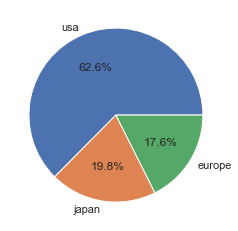

In [51]:
sns.set_theme()
origin_count = mpg['origin'].value_counts().reset_index()
plt.pie(labels=origin_count['index'], x=origin_count['origin'], autopct='%.1f%%')